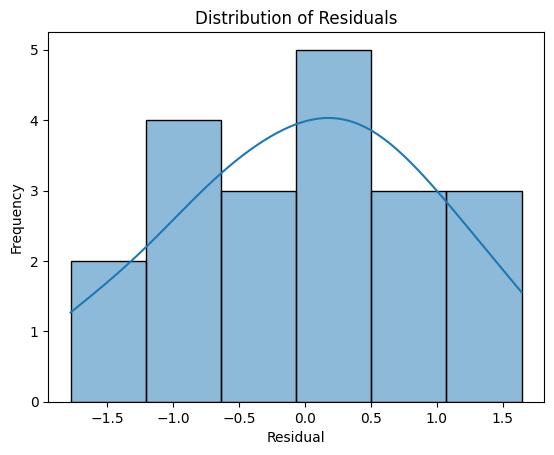

In [1]:
#Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
#using Seaborn's "diamonds" dataset.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)
y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


In [53]:
#Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
#Mean Squared Error (RMSE) for a linear regression model.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate sample regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 104.20222653187027
Mean Absolute Error (MAE): 8.416659922209051
Root Mean Squared Error (RMSE): 10.207949183448665


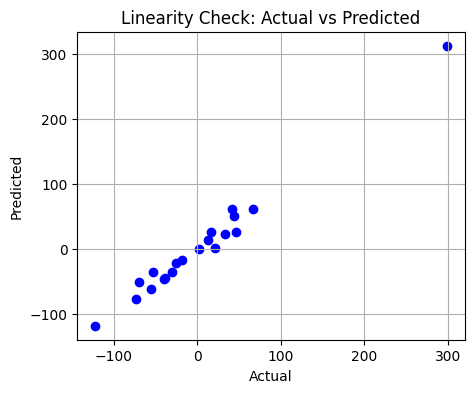

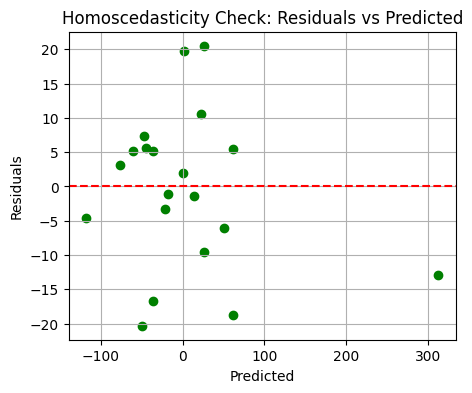

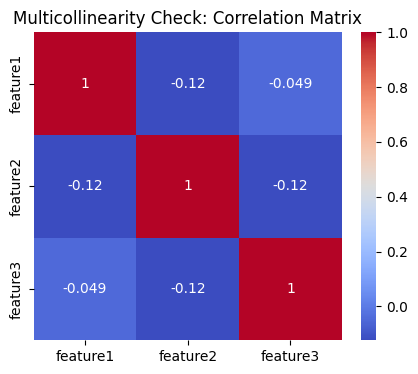

In [55]:
# Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
#linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic data with 3 features
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)
df = pd.DataFrame(X, columns=["feature1", "feature2", "feature3"])
df["target"] = y

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[["feature1", "feature2", "feature3"]], df["target"], test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Linearity: actual vs predicted
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.title("Linearity Check: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()

# Homoscedasticity: residuals vs predicted
plt.figure(figsize=(5, 4))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Multicollinearity: correlation matrix
plt.figure(figsize=(5, 4))
corr_matrix = df[["feature1", "feature2", "feature3"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Multicollinearity Check: Correlation Matrix")
plt.show()


In [57]:
# Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
#performance of different regression models

import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=200, n_features=5, noise=15, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    # Train pipeline
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print results
    print(f"\n{name}")
    print("R² Score:", round(r2, 3))
    print("RMSE:", round(rmse, 3))



Linear Regression
R² Score: 0.978
RMSE: 13.834

Ridge Regression
R² Score: 0.978
RMSE: 13.764

Lasso Regression
R² Score: 0.978
RMSE: 13.814

Decision Tree
R² Score: 0.759
RMSE: 45.774

Random Forest
R² Score: 0.901
RMSE: 29.287


In [59]:
# Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
#R-squared score

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

# Generate simple regression data (1 feature)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print model details
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared Score:", r2_score(y_test, y_pred))


Coefficient: 44.24418215597419
Intercept: 0.09922221422587718
R-squared Score: 0.9374151607623286


Coefficient (slope): 0.10502451738435337
Intercept: 0.9202696135546731
R-squared Score: 0.45661658635167657


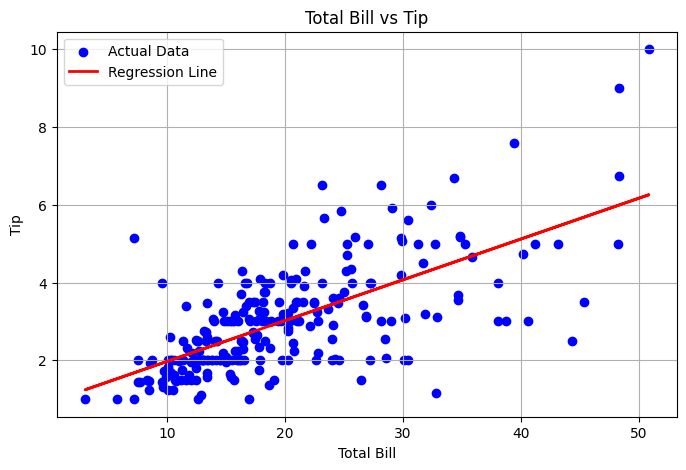

In [61]:
#. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
#simple linear regression and visualizes the results.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the tips dataset
tips = sns.load_dataset('tips')

# Extract total_bill and tip columns
X = tips[['total_bill']]
y = tips['tip']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict tips
y_pred = model.predict(X)

# Print model details
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared Score:", model.score(X, y))

# Plot the data and regression line
plt.figure(figsize=(8, 5))
plt.scatter(tips['total_bill'], tips['tip'], color='blue', label='Actual Data')
plt.plot(tips['total_bill'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.grid(True)
plt.show()


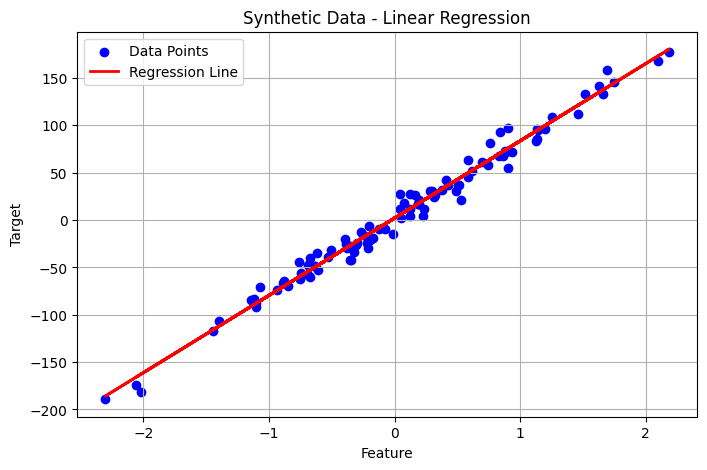

Coefficient (slope): 81.59750942734041
Intercept: 2.0270143888108567


In [63]:
#Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
#model to predict new values and plot the data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Create synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=1)

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot data points and regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Synthetic Data - Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

# Print model parameters
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)



In [65]:
#. Write a Python script that pickles a trained linear regression model and saves it to a file


import pickle
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Create synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Save the trained model using pickle
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been pickled and saved as 'linear_model.pkl'")


Model has been pickled and saved as 'linear_model.pkl'


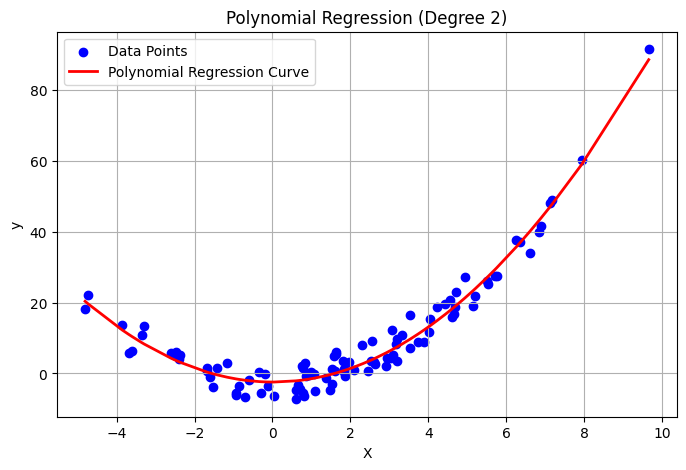

Intercept: -2.41483566735363
Coefficients: [ 0.         -0.03402887  0.97774948]


In [69]:
# Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
#regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X**2 + np.random.normal(-3, 3, 100)
X = X.reshape(-1, 1)

# Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the linear regression model on polynomial features
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Sort values for smooth curve
sorted_indices = X[:, 0].argsort()
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the data and regression curve
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


In [71]:
# Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
#regression model to the data. Print the model's coefficient and intercept.
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Target with some noise

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficient and intercept
print("Coefficient (slope):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])




Coefficient (slope): 2.7701133864384837
Intercept: 4.215096157546747


Degree 1 - R² Score: 0.5979
Degree 2 - R² Score: 0.8776
Degree 3 - R² Score: 0.9995
Degree 4 - R² Score: 0.9995
Degree 5 - R² Score: 0.9995


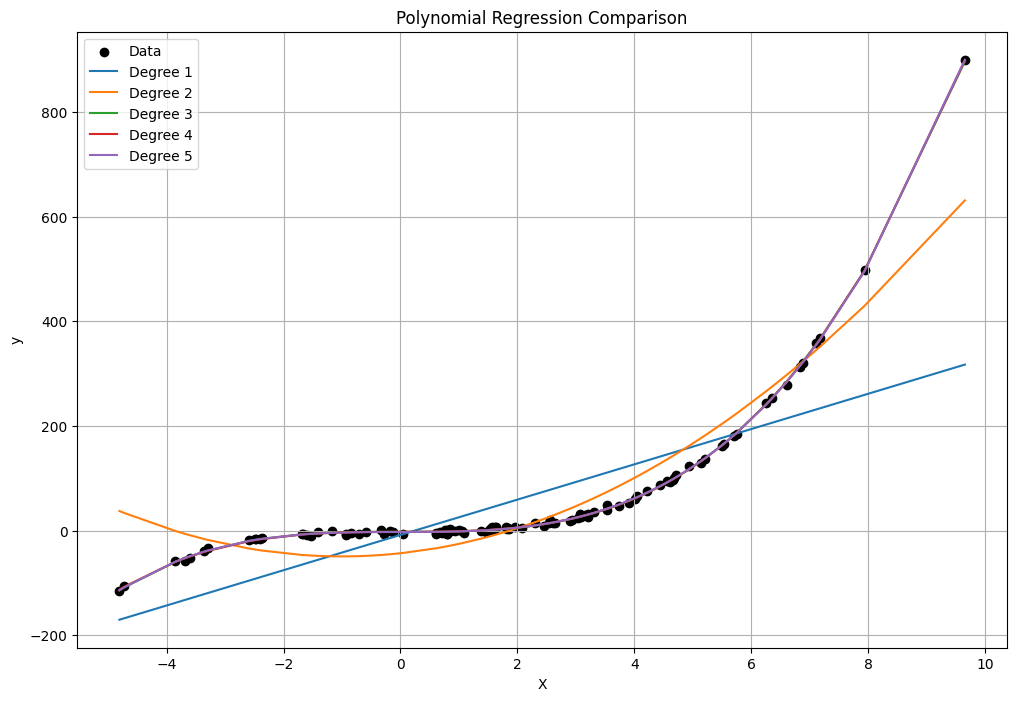

In [73]:
#. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
#compares their performance.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X**3 + np.random.normal(-3, 3, 100)
X = X.reshape(-1, 1)

# Plot setup
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='black', label='Data')

# Try polynomial degrees 1 through 5
for degree in range(1, 6):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # Calculate R^2 score
    r2 = r2_score(y, y_pred)
    print(f"Degree {degree} - R² Score: {r2:.4f}")

    # Sort for smooth plotting
    sorted_indices = X[:, 0].argsort()
    X_sorted = X[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    plt.plot(X_sorted, y_pred_sorted, label=f'Degree {degree}')

plt.title("Polynomial Regression Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [75]:
# Write a Python script that fits a simple linear regression model with two features and prints the model's
#coefficients, intercept, and R-squared score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
X1 = np.random.rand(100, 1) * 10
X2 = np.random.rand(100, 1) * 20
X = np.hstack((X1, X2))  # Combine into two features

# Generate target variable with some noise
y = 3 * X1.flatten() + 2 * X2.flatten() + np.random.randn(100) * 2

# Create and fit the model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Print results
print("Coefficients:", model.coef_)       # Coefficients for X1 and X2
print("Intercept:", model.intercept_)     # Intercept
print("R-squared score:", r2_score(y, y_pred))  # R² score


Coefficients: [2.88967089 1.97411532]
Intercept: 0.6146106135942944
R-squared score: 0.9815253613165991


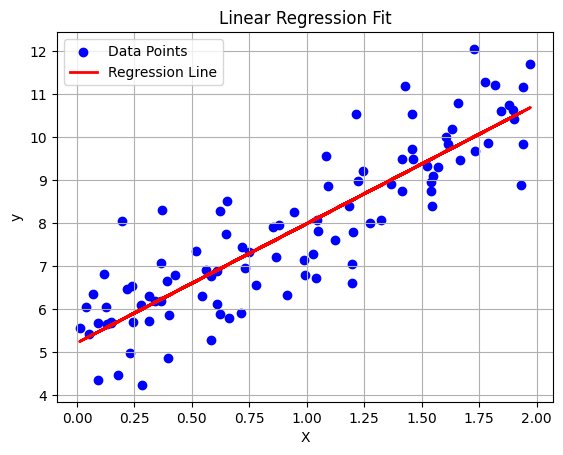

In [77]:
# Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
#regression line along with the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 5 + 3 * X + np.random.randn(100, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
#Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
#with multiple features.

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

# Generate synthetic dataset with multiple features
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Print VIF results
print(vif_data)


     Feature       VIF
0  Feature_1  1.019320
1  Feature_2  1.012651
2  Feature_3  1.059337
3  Feature_4  1.046592
4  Feature_5  1.020596


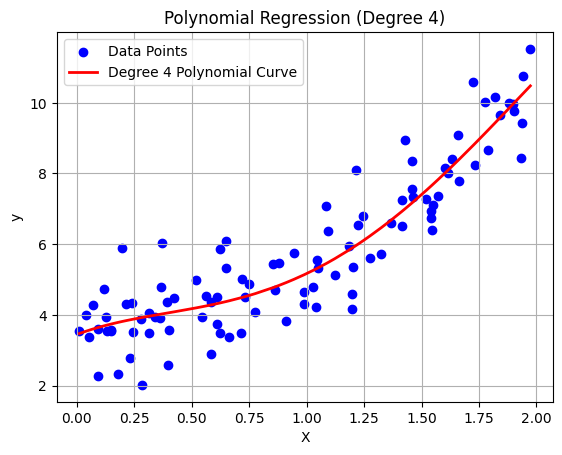

In [81]:
# Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
#polynomial regression model, and plots the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 + 2 * X + X**2 - X**3 + 0.5 * X**4 + np.random.randn(100, 1)

# Create polynomial features (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Sort the data for smooth curve
X_sorted = np.sort(X, axis=0)
X_poly_sorted = poly.transform(X_sorted)
y_sorted_pred = model.predict(X_poly_sorted)

# Plot
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='Degree 4 Polynomial Curve')
plt.title("Polynomial Regression (Degree 4)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [83]:
# Write a Python script that creates a machine learning pipeline with data standardization and a multiple
#linear regression model, and prints the R-squared score

import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data for multiple linear regression
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline with standardization and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print R-squared score
print("R-squared score:", r2)


R-squared score: 0.9820248587822377


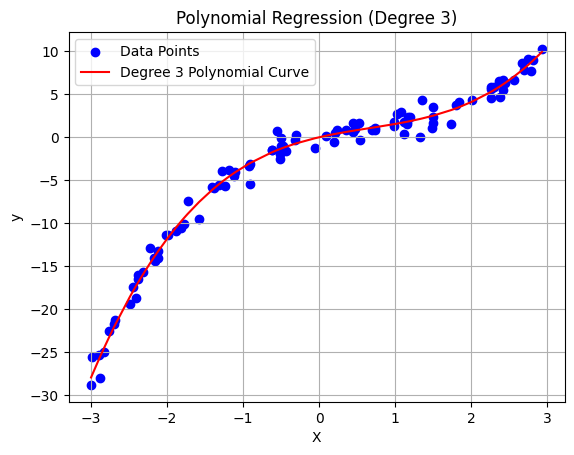

In [85]:
# Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
#regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Generate synthetic data
np.random.seed(1)
X = 6 * np.random.rand(100, 1) - 3  # X in range [-3, 3]
y = 0.5 * X**3 - X**2 + 2 * X + np.random.randn(100, 1)

# Step 2: Transform features for degree 3 polynomial
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Step 3: Train linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict for plotting
X_sorted = np.sort(X, axis=0)
X_poly_sorted = poly.transform(X_sorted)
y_pred = model.predict(X_poly_sorted)

# Step 5: Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_sorted, y_pred, color='red', label='Degree 3 Polynomial Curve')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
# Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
#the R-squared score and model coefficients.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
true_coeffs = np.array([2.5, -1.0, 3.2, 0.7, -2.2])
y = X @ true_coeffs + np.random.randn(100) * 0.5  # y = Xw + noise

# Step 2: Train the model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict and evaluate
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Step 4: Output
print("R-squared Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared Score: 0.86622558851145
Coefficients: [ 2.36852534 -1.21228397  3.43153335  0.71913119 -2.35711178]
Intercept: 0.1186059687467722


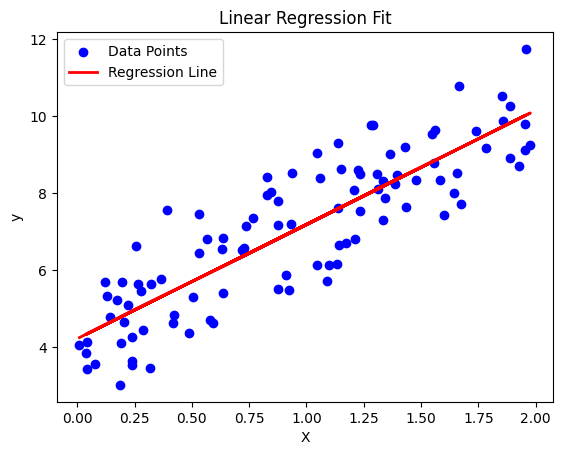

In [89]:
# Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
#data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Step 2: Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict
y_pred = model.predict(X)

# Step 4: Visualize data and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


In [91]:
#Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data
np.random.seed(1)
X = np.random.rand(100, 3)  # 100 samples, 3 features
true_coeffs = [5, 2, -3]
y = X @ true_coeffs + np.random.randn(100) * 0.5  # y = 5*X1 + 2*X2 - 3*X3 + noise

# Step 2: Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict and evaluate
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Step 4: Output
print("R-squared Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared Score: 0.9367482833874483
Coefficients: [ 4.90797712  2.11887861 -3.13709789]
Intercept: 0.078116673288402


In [93]:
#Write a Python script that demonstrates how to serialize and deserialize machine learning models using
#joblib instead of pickling

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import joblib

# Step 1: Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Step 2: Train a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Serialize (save) the model using joblib
joblib.dump(model, 'linear_model_joblib.pkl')
print("Model saved using joblib.")

# Step 4: Deserialize (load) the model
loaded_model = joblib.load('linear_model_joblib.pkl')
print("Model loaded from file.")

# Step 5: Predict and evaluate
y_pred = loaded_model.predict(X)
print("R-squared Score:", r2_score(y, y_pred))


Model saved using joblib.
Model loaded from file.
R-squared Score: 0.9538252459635717


In [95]:
#Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
#the Seaborn 'tips' dataset

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Define features (X) and target (y)
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

# Define categorical and numeric columns
categorical_features = ['sex', 'smoker', 'day', 'time']
numeric_features = ['total_bill']

# Create a column transformer with one-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # Keep numerical columns as-is
)

# Create a pipeline: preprocessing + linear regression
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print("R-squared Score:", r2_score(y_test, y_pred))


R-squared Score: 0.47735804203610954


In [97]:
# Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.



import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 5)
true_coeffs = np.array([1.5, -2.0, 3.0, 0.0, 0.5])
y = X @ true_coeffs + np.random.randn(100) * 0.5  # Add noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Print coefficients and R² scores
print("Linear Regression Coefficients:", lr_model.coef_)
print("Linear Regression R² Score:", r2_score(y_test, lr_pred))

print("\nRidge Regression Coefficients:", ridge_model.coef_)
print("Ridge Regression R² Score:", r2_score(y_test, ridge_pred))


Linear Regression Coefficients: [ 1.50641387 -1.95733372  3.09710079 -0.01157183  0.4364234 ]
Linear Regression R² Score: 0.985580523749506

Ridge Regression Coefficients: [ 1.48088052 -1.93727932  3.05800328 -0.01478249  0.42507308]
Ridge Regression R² Score: 0.9846584823639785


In [99]:
# Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
#dataset.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation and use R² as the scoring metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-validation R² scores:", scores)
print("Mean R² score:", np.mean(scores))


Cross-validation R² scores: [0.98012075 0.9844046  0.98981268 0.98405405 0.97718464]
Mean R² score: 0.9831153456500197


In [101]:
#. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.



import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare polynomial degrees
degrees = [1, 2, 3, 5, 7]

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predict and calculate R² score
    y_pred = model.predict(X_poly_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Degree {degree}: R-squared = {r2:.4f}")


Degree 1: R-squared = 0.3851
Degree 2: R-squared = 0.7369
Degree 3: R-squared = 0.9201
Degree 5: R-squared = 0.9257
Degree 7: R-squared = 0.9260
